In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
ls=LabelEncoder()
df['species']=ls.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
from sklearn.model_selection import train_test_split
X= df[['sepal_length','sepal_width','petal_length',	'petal_width' ]]
Y=df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [22]:
Y_train.shape

(105,)

In [23]:
Y_train.head()

60     1
116    2
144    2
119    2
108    2
Name: species, dtype: int32

In [25]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
pred =lg.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, pred))

0.9777777777777777


In [28]:
matrix= confusion_matrix(Y_test, pred, labels = lg.classes_)
print(matrix)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


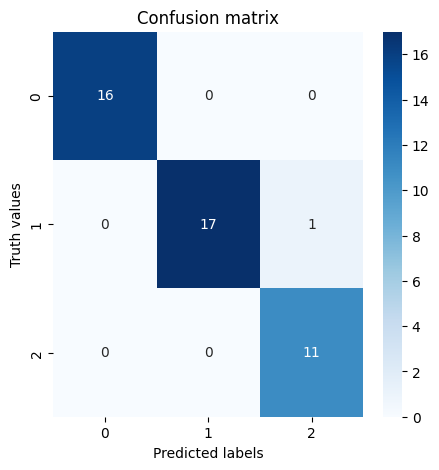

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(matrix, annot=True, cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('Truth values')
plt.title('Confusion matrix')
plt.show()

In [33]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

